In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
df = pd.read_csv("TelcoCustomerChurn.csv")

In [3]:
# Preprocessing
df.drop(columns=['customerID'], errors='ignore', inplace=True)  # Drop irrelevant columns
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert 'Churn' to binary values
df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical variables
df.fillna(df.median(), inplace=True)  # Handle missing values

In [4]:
# Splitting features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Baseline Model - Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7842441447835344
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [7]:
# Hyperparameter Tuning - Random Forest using RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
try:
    print("\nStarting Randomized Search for Random Forest...\n")
    rf_random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, n_iter=10, random_state=42)
    rf_random_search.fit(X_train, y_train)
    print("\nRandomized Search Completed!")
    print("Best Random Forest Parameters:", rf_random_search.best_params_)
except Exception as e:
    print("Error occurred during Randomized Search:", e)


Starting Randomized Search for Random Forest...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Randomized Search Completed!
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


In [8]:
# Regularization Techniques - Ridge & Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("Ridge Regression Coefficients:", ridge.coef_)
print("Lasso Regression Coefficients:", lasso.coef_)

Ridge Regression Coefficients: [ 0.01987996  0.04085415  0.04581955 ...  0.00237912 -0.00719931
 -0.00596232]
Lasso Regression Coefficients: [ 0.         -0.05103647  0.         ...  0.         -0.
 -0.        ]


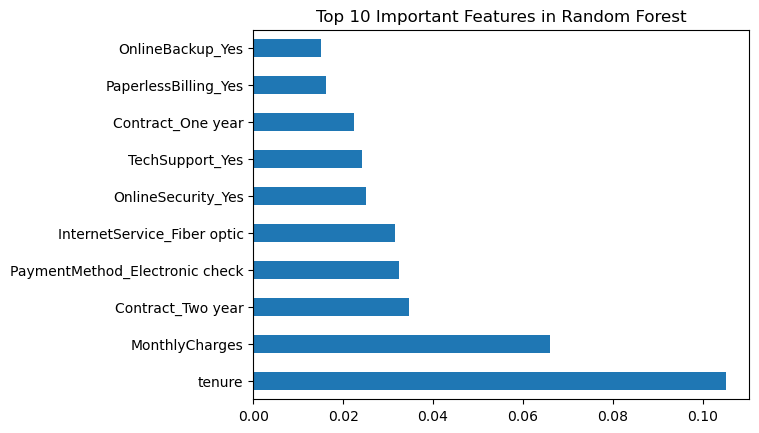

In [9]:
# Visualization - Feature Importance
feature_importance = pd.Series(rf_random_search.best_estimator_.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features in Random Forest")
plt.show()